# Pandas for Data Analysis

## Agenda

 - Intro
 - Data I/O
 - Use basic matplotlib to create visualizations
 - Using pandas plot method to plot graphs from DataFrame
 - Recap

## Intro

### Learning objective(s)

 - Get basic introduction to matplotlib
 - Get introduction to pandas plot functions

 
### Packages

 - Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/))
 - Numpy ([documentation](https://docs.scipy.org/doc/))
 - Matplotlib ([documentation](https://matplotlib.org/api/api_overview.html))

## Data I/O

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# A version of the titanic data set contianing null values, 
# and other data quality issues
observations = pd.read_csv('resources/titanic.csv')

# Renaming: We can also convert the variable names 
# to be a little more consistent and user friendly
observations.columns = list(map(lambda x: str(x).lower(), 
                                observations.columns))

print(observations.dtypes)

#This magic function ensures that you can view graphs 
# as they are created in notebook
%matplotlib inline

passengerid      int64
survived         int64
pclass           int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object


In [2]:
plt.style.use('default')

### What is Matplotlib?

__Overview__

Matplotlib is a library that allows visualization within Python.  You can generate line plots, scatter plots, histograms, bar charts, etc., with just a few lines of code. 

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.

For simple plotting the pyplot module provides a MATLAB-like interface, particularly when combined with IPython. For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users.

The [matplotlib.pyplot](https://matplotlib.org/api/pyplot_summary.html) module contains functions that allow you to generate many kinds of plots quickly. 

Matplotlib was originally written by John D. Hunter, has an active development community, and is distributed under a BSD-style license. Michael Droettboom was nominated as matplotlib's lead developer shortly before John Hunter's death in 2012, and further joined by Thomas Caswell.

__Important note__: When setting the title or labels do not write as `plt.title = "Great Title"` but rather `plt.title("Great Title")`

In [4]:
plt.plot?


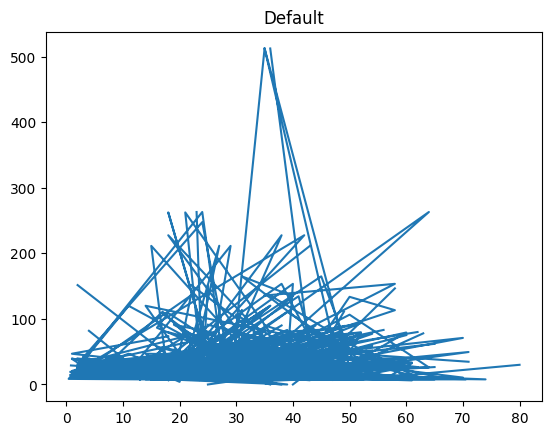

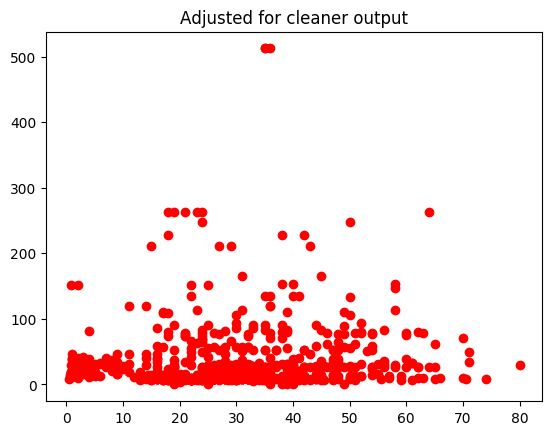

In [5]:
# Just calling plt plot will produce a line graph or scatter plot depending how we call it
# For more details look to documentation: 
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
plt.figure()
plt.plot(observations['age'], observations['fare'])

# Create title for our graph
# Default of line graph is much more useful 
# when looking at time series data
plt.title('Default')

plt.figure()
# Below we have some of the options of how we could adjust our graph 
# such as color, marker and linestyle

plt.plot(observations['age'], observations['fare'], linestyle = '',
         marker ='o',color = 'r')
plt.title('Adjusted for cleaner output')
plt.show()

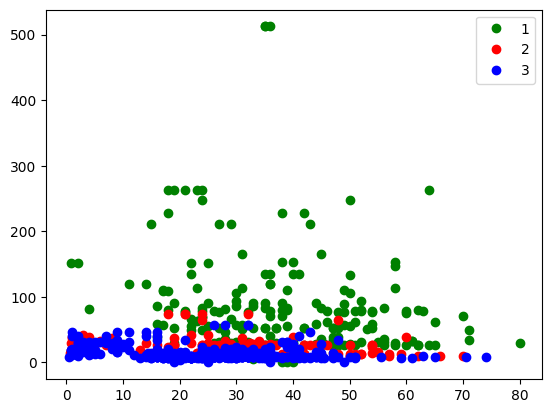

In [6]:
pclasses = sorted(observations.pclass.unique())
colors = ['green','red','blue']

# We can also label our points using a legend
# If we have not called plt.show(), the new graphs will print one on top of the other
# Using a label in our plot also makes it easier to call the legend to aid visualization

# We will run a for loop to create 3 graphs
for i,color in zip(pclasses,colors):
    obs_subset = observations[observations.pclass == i]
    
    plt.plot(obs_subset['age'], obs_subset['fare'], linestyle = '',
             marker ='o', color = color, label = i)
    
plt.legend()  

(0, 175)

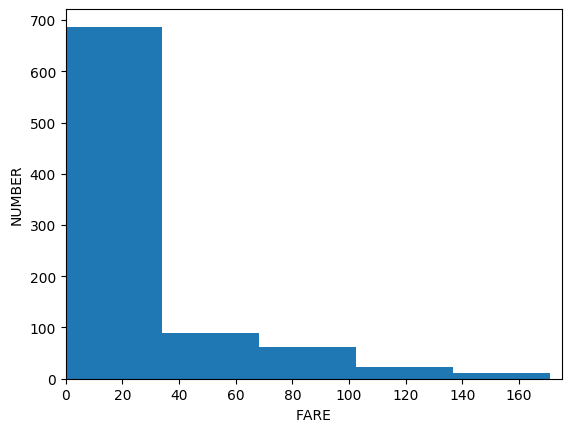

In [5]:
# There are many more options of types of graphs available
# An important one to visualize distribution is the histogram

plt.hist(observations.fare, bins = 15)

#adjust title of axes
plt.xlabel('FARE')
plt.ylabel('NUMBER')

#Adjust range of x-axis
plt.xlim(0, 175)


age     0.389108
fare    4.787317
dtype: float64


//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


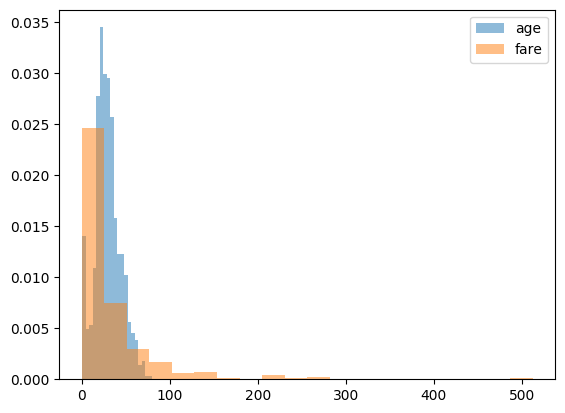

In [6]:
# Let's look back at the two fields for which we viewed the skew of the different distributions in a prior notebook
skew_vals = observations.select_dtypes('float').skew()
print(skew_vals)

for i in skew_vals.index:
    # density parameter normalizes the distribution so that we can see the two graphs on a similar scale
    # alpha parameter defines how transparent the graph will be on a scale of 0 to 1
    # with 0 being completely transparent
    
    plt.hist(observations[i],alpha = 0.5,density=True,label = i,bins = 20)

plt.legend()
# We can now see that the distribution for fare is skewed heavily to the right

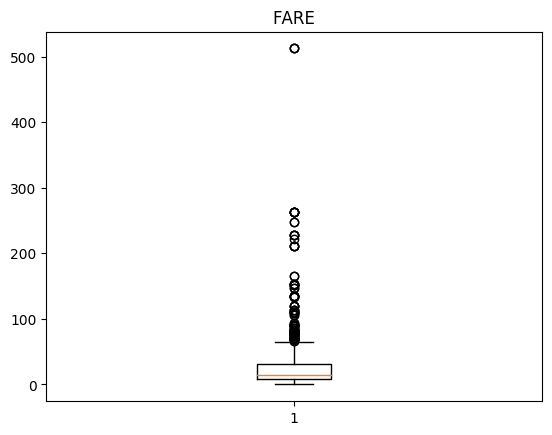

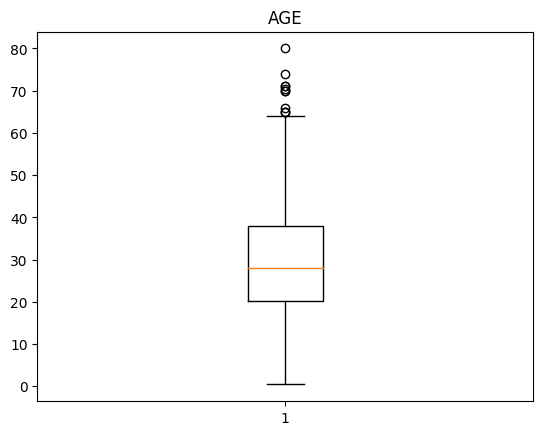

In [8]:
# Box plots may be another useful means for viewing distribution
plt.figure()
plt.boxplot(observations.fare.dropna())
plt.title('FARE')

plt.figure()
# Null values will throw an error when trying to plot
plt.boxplot(observations.age.dropna(),)
plt.title('AGE')
plt.show()


Grouped table:


,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<BarContainer object of 3 artists>

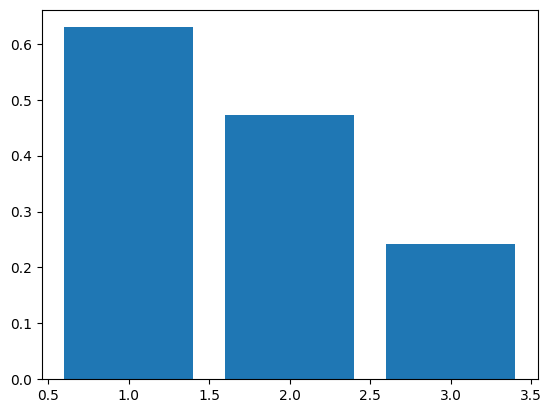

In [10]:
# We can use bar plot to visualize numerical features broken down by different categorical features
# This is first exposure to the groupby function. We will discuss further in the next lecture
grouped_vals = observations.groupby('pclass',as_index=False)['survived'].mean()

print('Grouped table:')
display(grouped_vals)

plt.bar(grouped_vals.pclass,grouped_vals.survived)


## Using pandas built-in plot function
Uses Matplotlib to create graphs, but may be a bit simpler to build out certain graphs from pandas dataframes

We will go through the above plots and replicate them using this functionality

<Figure size 640x480 with 0 Axes>

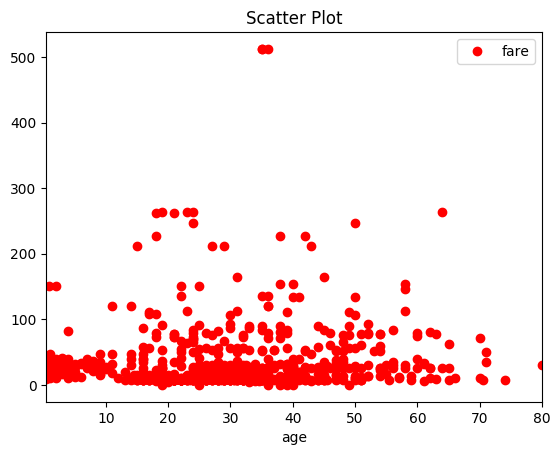

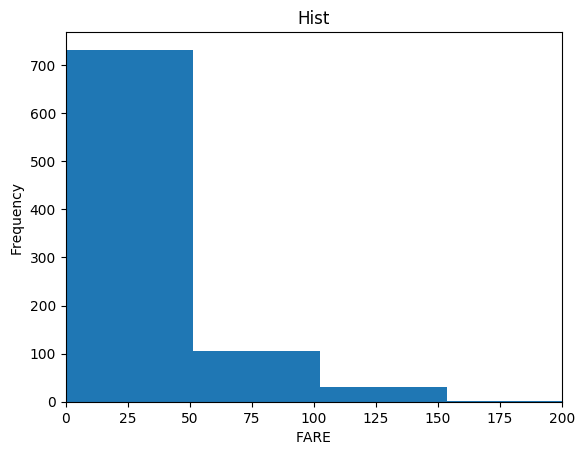

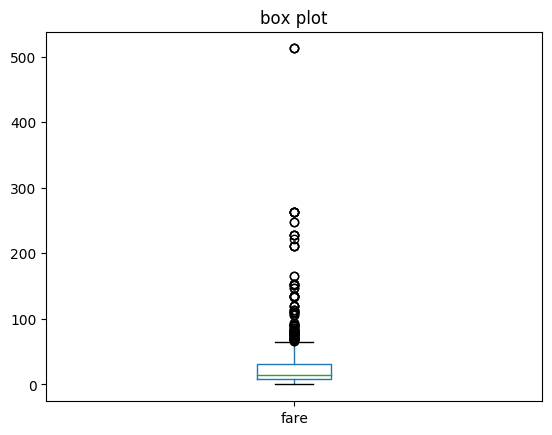

<Figure size 640x480 with 0 Axes>

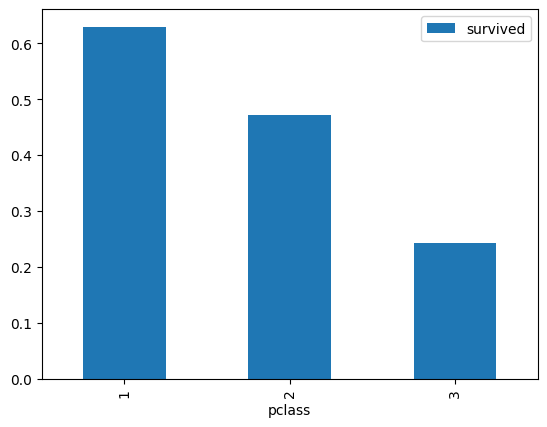

In [11]:
# Scatter plot
plt.figure()
observations.plot(x = 'age', y = 'fare',marker = 'o',linestyle = '', color = 'r',title = 'Scatter Plot')

plt.figure()
# Hist
observations['fare'].plot(kind = 'hist',title = 'Hist')
# Does not always have all the options available to standard means of graphing above
# But due to it being built using matplotlib, we can still use the methods shown above
plt.xlabel('FARE')
plt.xlim(0,200)

plt.figure()
#box plot
observations['fare'].plot(kind='box', title = 'box plot')

plt.figure()
#bar plot
grouped_vals.plot(kind = 'bar',x = 'pclass',y = 'survived')

### Lab 1

Please do lab excercise 1 in the adjoining lab notebook

## Recap

### Learning objectives

 - Get basic introduction to matplotlib
 - Get introduction to pandas plot functions
 
### Launch questions

 - What is the syntax to plot a histogram or bar plot using pandas?
